In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import math

RawData = "tmp0-75.DAT"
f = open(RawData, "r")
a = np.fromfile(f, dtype=np.uint32)
t = a[-1]
V = a[:-1].copy()

Fech = 100000.0*len(V)/t # in MHz

Fech = 100000.0*len(V)/t # in MHz
print Fech



26.1625544285


In [14]:
#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

In [15]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

In [16]:
rawSig = []
for k in range(len(Ma)):
    rawSig.append(Mb[k])
    rawSig.append(Ma[k])
rawSig = rawSig - np.average(rawSig)

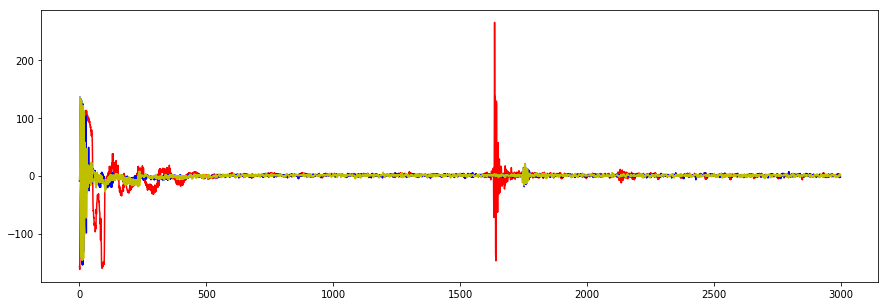

In [19]:
plt.figure(figsize=(15,5))
plt.plot(rawSig[0:3000],"r") 
plt.plot(rawSig[10000:13000],"b") 
plt.plot(rawSig[20000:23000],"y") 
#plt.savefig('datas_'+RawData.split("/")[-1]+'.jpg', bbox_inches='tight')
plt.show()

In [20]:
tmp = rawSig[10000:13000]
for i in range(8):
    k = i+2
    tmp += rawSig[k*10000:k*10000+3000]

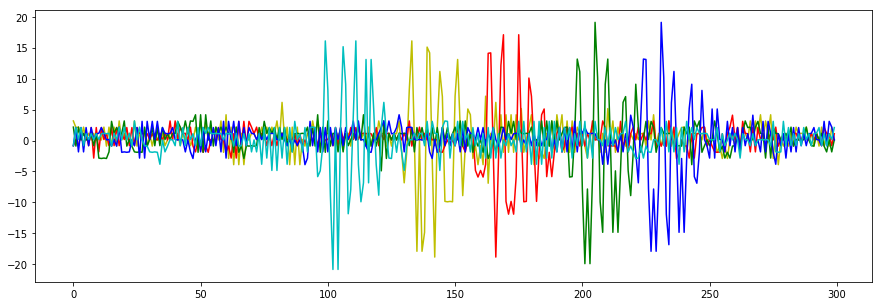

In [38]:
plt.figure(figsize=(15,5)) 
plt.plot(rawSig[41400:41700],"y") 
plt.plot(rawSig[51400:51700],"r") 
plt.plot(rawSig[61400:61700],"g") 
plt.plot(rawSig[71400:71700],"b") 
plt.plot(rawSig[81400:81700],"c") 
 
#plt.savefig('datas_'+RawData.split("/")[-1]+'.jpg', bbox_inches='tight')
plt.show()